In [1]:
import sys, os, git
import numpy as np
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path)
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries, prepare_figure
path_figures = "/examples/"

In [3]:
def random_linear_generator(xmin=0, xmax=10, slope=0.3, alpha=0.1, pref = 1):
    x = np.linspace(xmin, xmax)
    y = slope*x + pref * (np.random.random(len(x))-0.5)*x**alpha
    return x, y

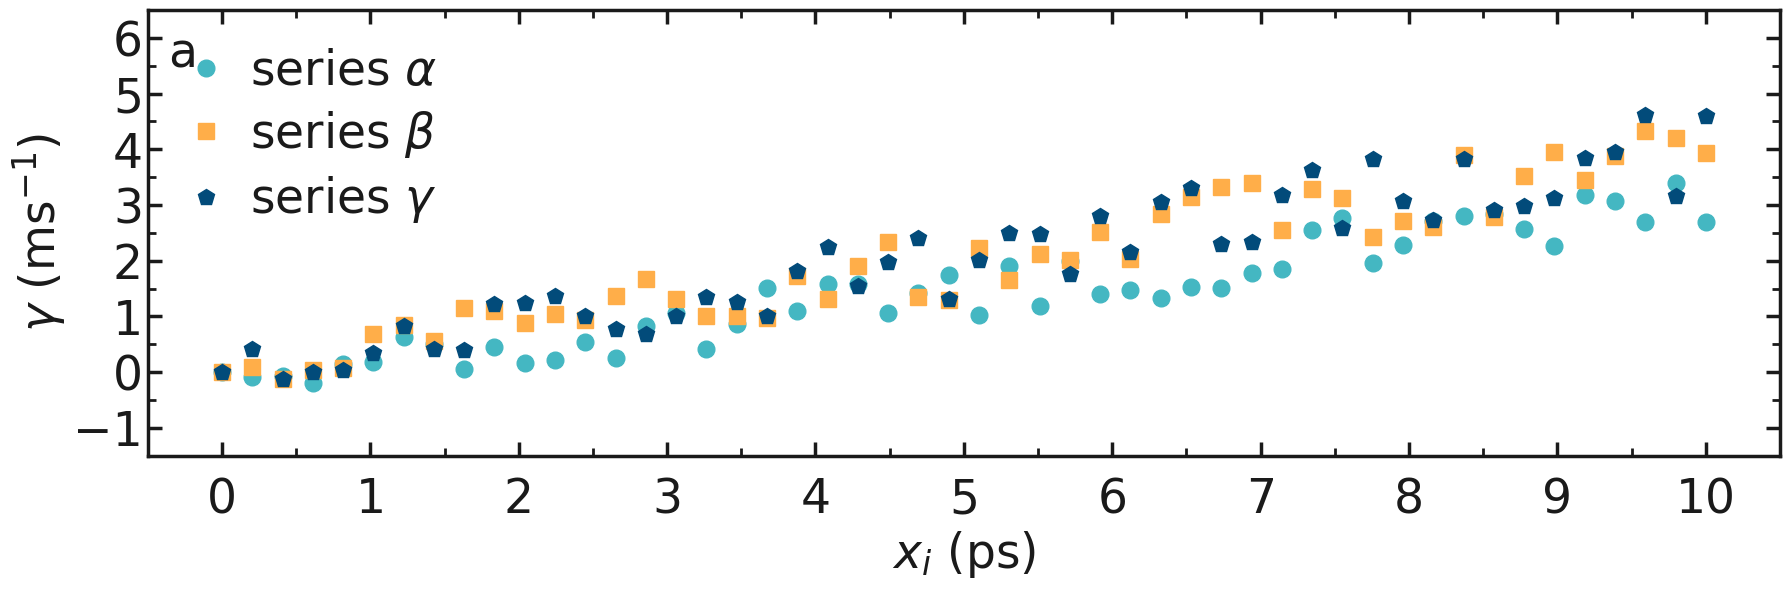

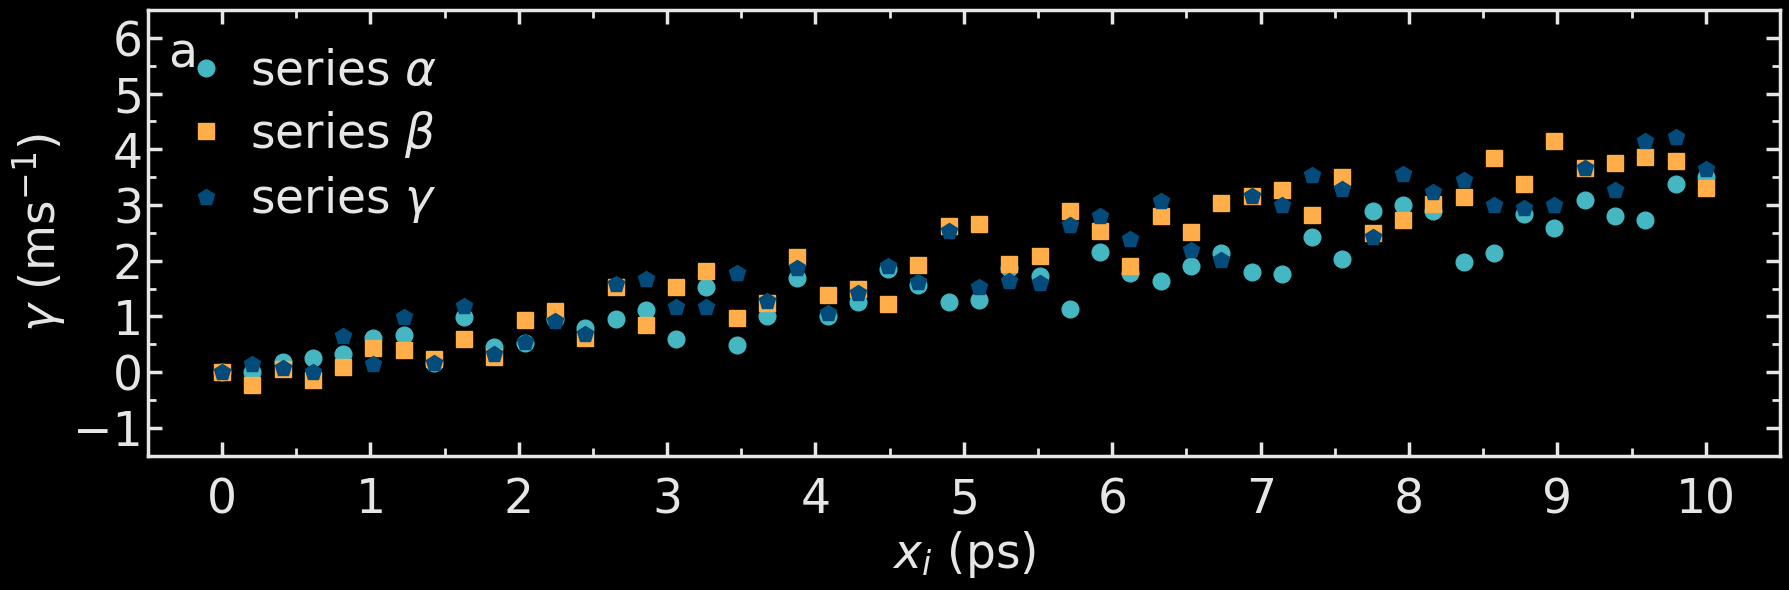

In [4]:
filename = "example-1"
desired_transparency = False
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency=desired_transparency, desired_figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x, y = random_linear_generator(slope = 0.3, alpha = 0.1)
    ax[-1].plot(x, y, 'o', color=colors["mycyan"],
                markersize = 12, linewidth=4, label=r'series $\alpha$')
    x, y = random_linear_generator(slope = 0.4, alpha = 0.2)
    ax[-1].plot(x, y, 's', color=colors["myorange"],
                markersize = 12, linewidth=4, label=r'series $\beta$')
    x, y = random_linear_generator(slope = 0.4, alpha = 0.2)
    ax[-1].plot(x, y, 'p', color=colors["mydarkblue"],
                markersize = 12, linewidth=4, label=r'series $\gamma$')
    complete_panel(ax[-1], r'$x_i$ (ps)', r'$\gamma$ (ms$^{-1}$)', legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(-0.5, 10.5), y_boundaries=(-1.5, 6.5),
                   x_ticks=np.arange(0, 11, 1), y_ticks=np.arange(-1, 7, 1)) 
    add_subplotlabels(fig, ax, ["a"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename, transparency = desired_transparency)